In [1736]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import category_encoders as ce

plt.rcParams.update({'font.size': 10}) # A betűméret növelése

In [1737]:
#adatbázis betöltése
df = pd.read_csv('ds_salaries.csv', delimiter=',', encoding="ISO-8859-2")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [1738]:
df.shape

(607, 12)

In [1739]:
#"Unnamed: 0" oszlop eltávolítása
# salary, salary_currency eltávolítása, mert van külön salary_in_usd
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis='columns', inplace=True)


In [1740]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [1741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [1742]:
#A sorok és oszlopok száma
df.shape

(607, 9)

607 sor, 9 oszlop tartalmaz: 3db numerikus, 6db kategorikus változó

In [1743]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Nincs hiányzó érték az adatlhalmazban!

In [1744]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [1745]:
df.duplicated().sum()

42

In [1746]:
df.drop_duplicates(inplace=True)

In [1747]:
df.shape

(565, 9)

In [1748]:
#Exploratory Data Analysis
#Numerikus változók megtekintése leíró statisztikával

df.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


A 3db numerikus változó leíró statisztikai összefoglalója alapján már sejthető, hogy az adatok zömmel 2022-ből kerültek ki, a salary_in_usd max értéke az átlagoshoz képes túl nagy eltérést mutat, sejthetünk némi outlier jelenlétet, a remote_ratio esetén pedig valószínű, hogy többen dolgoznak home-officeban, mint nem.

In [1749]:
import pycountry

def country_code_to_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return "Unknown Country"

# Alakítsuk át az országkódokat országnevekké
df['employee_residence'] = df['employee_residence'].apply(country_code_to_name)

df[['employee_residence']].head()  # Megjelenítjük az első néhány sort a konverzióból


,employee_residence
0,Germany
1,Japan
2,United Kingdom
3,Honduras
4,United States


In [1750]:
# Ellenőrizzük, hogy van-e olyan rekord, ahol az országnév "Unknown Country"
unknown_countries = df[df['employee_residence'] == "Unknown Country"]
unknown_country_count = unknown_countries.shape[0]
unknown_country_count


0

In [1751]:
# Kiszűrjük azokat az értékeket, ahol a salary_in_usd kisebb, mint 14000 usd (ennyi a minimálbér az USA-ban)
filtered_df = df[df['salary_in_usd'] < 14000]

filtered_df.head()
# Összesítjük, hogy hány rekord felel meg a feltételnek
number_of_records = filtered_df.shape[0]
number_of_records
# Az összes kiválasztott rekord megjelenítése
filtered_df


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
15,2020,MI,FT,Data Analyst,8000,Pakistan,50,PK,L
18,2020,EN,FT,Data Science Consultant,5707,India,50,IN,M
21,2020,MI,FT,Product Data Analyst,6072,India,100,IN,L
38,2020,EN,FT,Data Analyst,10000,Nigeria,100,NG,S
50,2020,EN,FT,Data Analyst,6072,India,0,IN,S
77,2021,MI,PT,3D Computer Vision Researcher,5409,India,50,IN,M
96,2021,EN,PT,AI Scientist,12000,Brazil,100,US,S
113,2021,EN,PT,AI Scientist,12000,Pakistan,100,US,M
124,2021,EN,PT,Data Analyst,10354,Spain,50,ES,M
127,2021,MI,FT,Data Scientist,9466,India,0,IN,S


In [1752]:
#Pasztell paletta
sn.set_palette(sn.color_palette("pastel"))

#függvény definiálása két diagramhoz
def two_plot(df=df, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    fig.set_size_inches(10, 4)
    plt.tight_layout()
    sn.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], labeldistance=1.2, explode=explode)
    sn.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', padding=1)
    fig.text(0.5, 1.1, f'{xlabel} megoszlásának vizsgálata', size=12, ha="center", va="center")
    plt.show()

#függvény salaryhoz

def salary_visualization(df=df, x=None, xlabel=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sn.histplot(data=df, x=x, kde=True, ax=ax[0])
    sn.boxplot(data=df, x=x, ax=ax[1])
    sn.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[1].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} eloszlásának vizsgálata', size=12, ha="center", va="center")
    plt.show()

In [1753]:
#Néhány jellemző adatainak átnevezése érthető formába

df["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Középszintű", "Senior", "Expert"], inplace=True)
df["remote_ratio"].replace([0, 50, 100], ["Nincs távmunka", "Részben távmunka", "Távmunka"], inplace=True)
df["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Részmunkaidő", "Teljes munkaidő", "Megbízási szerződés alapján ", "Szabadúszó"], inplace=True)
df["company_size"].replace(["S", "M", "L"], ["Kis", "Közép", "Nagy"], inplace=True)

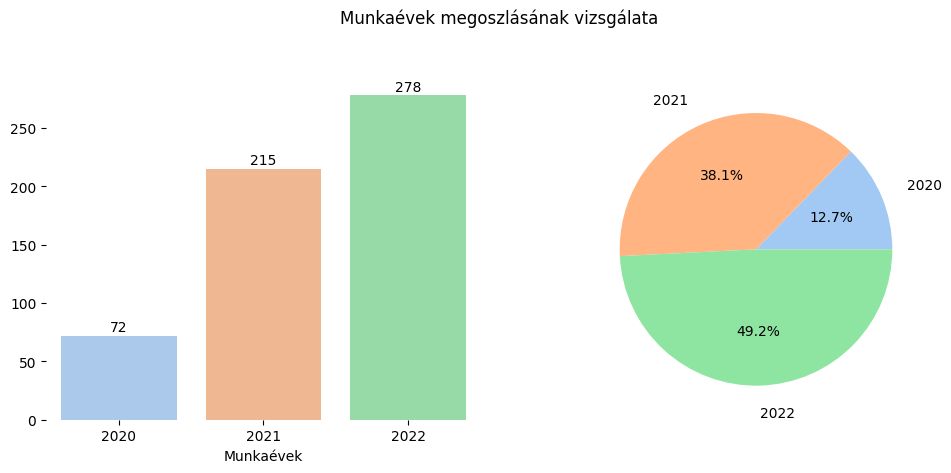

In [1754]:
#Munkaév ábrázolása bar és pie charton

two_plot(x="work_year", xlabel="Munkaévek")

Láthatjuk, hogy valóban a megfigyeltek több, mint fele, azaz 278 fő adata 2022-ből származik, kicsivel több, mint egyharmada, vagyis 215 főé 2021-ből és mindössze 12,7%-a, ami 72 főnek felel meg 2020-ból, tehát feltételezhető egyfajta gyors ütemű, egyenesarányú növekedés az évek múlásával az adattudósok számát illetően, amennyiben a mintánk reprezentatív. Vajon az LLM majd felülírja ezt?

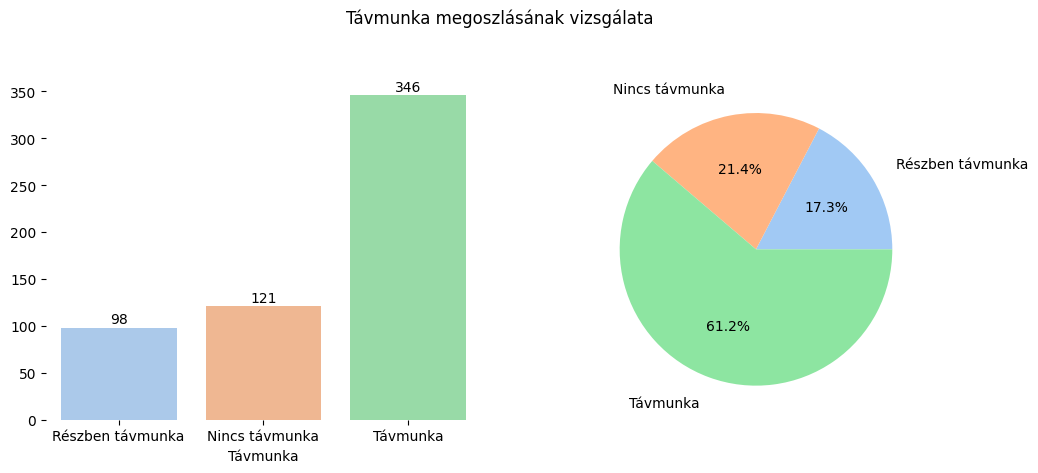

In [1755]:
#Remote ratio ábrázolása bar és pie charton

two_plot(x="remote_ratio", xlabel="Távmunka")

Láthatjuk, hogy a három év alatt a távmunka aránya az első vizsgált évhez mérten közel 4x, a második vizsgált évhez mérten pedig 3x-osára nőtt.
Nézzük meg, hogy az egyes években hogyan alakult ez a megoszlás!

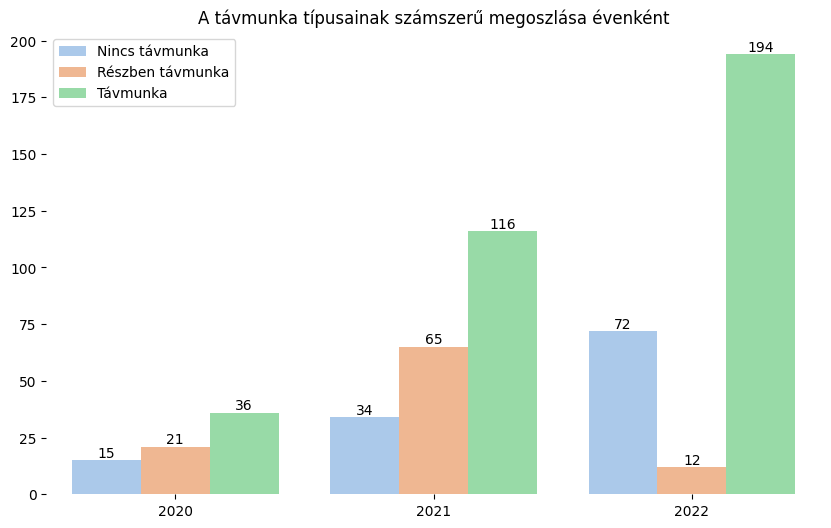

In [1756]:
# Diagram létrehozása a 'work_year' és 'remote_ratio' kapcsolatának ábrázolására
plt.figure(figsize=(10, 6))
sn.countplot(x='work_year', hue='remote_ratio', data=df)

# Az egyes oszlopok értékeinek megjelenítése az oszlopok felett
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             ha='center', va='bottom')

# Tengelyek eltávolítása
sn.despine(bottom=True, left=True)

# Az x és y tengely címének eltávolítása
plt.xlabel('')
plt.ylabel('')

plt.title('A távmunka típusainak számszerű megoszlása évenként')
plt.legend(title='')
plt.show()

A fenti diagramon kitűnik, hogy 2022-ből jóval több adat áll rendelkezésre, ezért nézzük meg pontosan milyen arányban viszonyulnak egymáshoz a különböző távmunkával kapcsolatos típusok éves szinten lebontva. Ehhez normalizáljuk az adatokat!

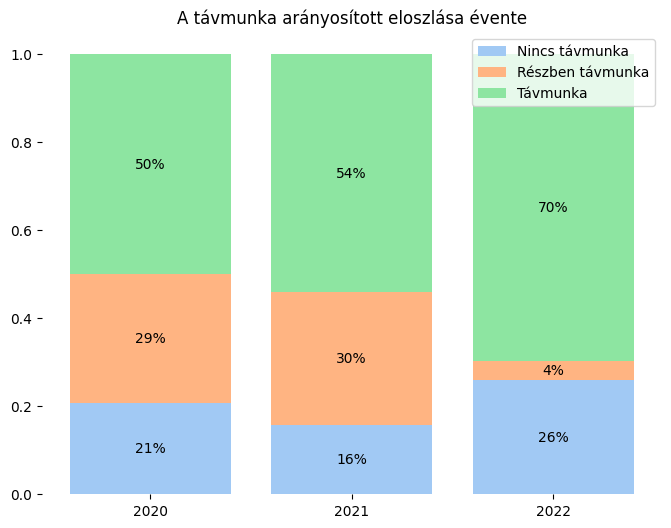

In [1757]:
# A távmunka arányainak normalizált halmozott oszlopdiagramjának létrehozása az egyes években

# Adatok normalizálása és előkészítése a halmozott oszlopdiagramhoz
normalized_df = df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')
normalized_df['total'] = normalized_df.groupby('work_year')['count'].transform('sum')
normalized_df['percentage'] = normalized_df['count'] / normalized_df['total']

plt.figure(figsize=(8, 6))
bottom = np.zeros(len(normalized_df['work_year'].unique()))
for ratio in sorted(normalized_df['remote_ratio'].unique()):
    subset = normalized_df[normalized_df['remote_ratio'] == ratio]
    plt.bar(subset['work_year'], subset['percentage'], bottom=bottom, label=ratio)
    bottom += subset['percentage'].values

# Százalékos értékek hozzáadása
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., p.get_y() + height/2, '{:.0%}'.format(height), ha='center', va='center')

# Csak a 2020, 2021 és 2022 évek megjelenítése az x tengelyen
plt.xticks([2020, 2021, 2022])


# Tengelyek eltávolítása
sn.despine(bottom=True, left=True)

plt.title('A távmunka arányosított eloszlása évente')
plt.legend()
plt.show()


A fenti halmozott diagramon jól láthatók az arányok az egyes munkavégzési helyek között. Egyértelmű növekedési tendencia állapítható meg a távmunkára vonatkozóan, mely adódhat a Covid-19 hozadékából, illetve a hibrid munkavégzés csökkenése a 2022-es évben feltételezhet egy elrendelt választási lehetőséget az irodai és a távmunka között a dolgozók tekintetében.

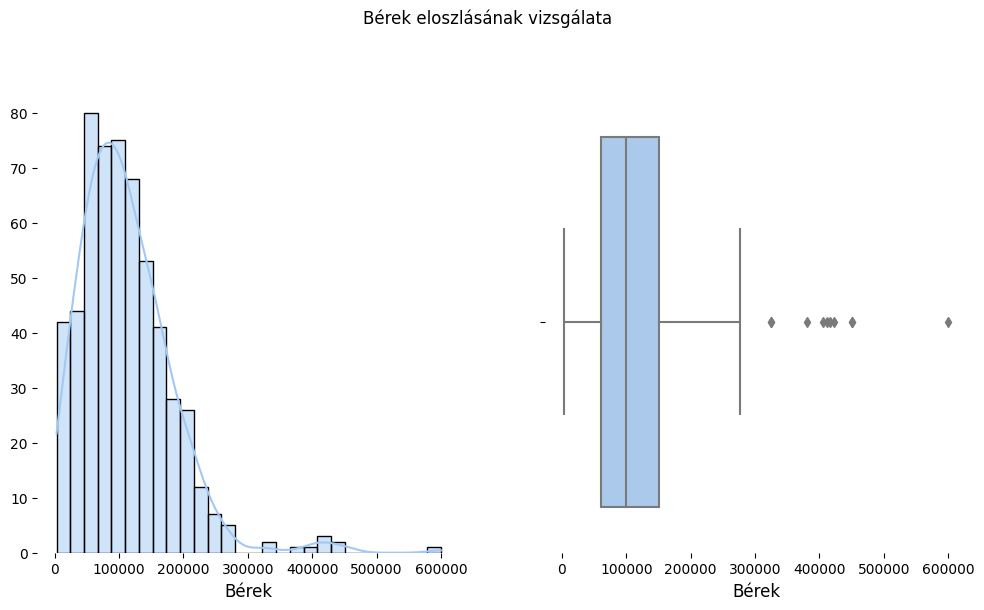

In [1758]:
# A salary_in_usd célváltozó vizsgálata

salary_visualization(x="salary_in_usd", xlabel="Bérek")

A fenti hisztogram elemzésével arra a konklúzióra jutottam, hogy a bérek alakulása pozitív ferde eloszlást követ, melynek középértéke 100.000 USD körül mozog, illetve észlelhetők outlierek, melyet a boxplot ábra is megerősít, 300.000 USD felett, így ezeknek az értékeknek az eltávolítása szükséges, hogy majd az előrejelzési modellek eredményeinek torzítását elkerüljem.

In [1759]:
#Outlierek kiszűrése

#outlier pontosítása
df[df.salary_in_usd > 300000]
#len(df[df.salary_in_usd > 300000])

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,Expert,Teljes munkaidő,Director of Data Science,325000,United States,Távmunka,US,Nagy
33,2020,Középszintű,Teljes munkaidő,Research Scientist,450000,United States,Nincs távmunka,US,Közép
63,2020,Senior,Teljes munkaidő,Data Scientist,412000,United States,Távmunka,US,Nagy
97,2021,Középszintű,Teljes munkaidő,Financial Data Analyst,450000,United States,Távmunka,US,Nagy
157,2021,Középszintű,Teljes munkaidő,Applied Machine Learning Scientist,423000,United States,Részben távmunka,US,Nagy
225,2021,Expert,Megbízási szerződés alapján,Principal Data Scientist,416000,United States,Távmunka,US,Kis
252,2021,Expert,Teljes munkaidő,Principal Data Engineer,600000,United States,Távmunka,US,Nagy
482,2022,Expert,Teljes munkaidő,Data Engineer,324000,United States,Távmunka,US,Közép
519,2022,Senior,Teljes munkaidő,Applied Data Scientist,380000,United States,Távmunka,US,Nagy
523,2022,Senior,Teljes munkaidő,Data Analytics Lead,405000,United States,Távmunka,US,Nagy


10 személy bére magasabb, mint 300.000 USD, így ezeket a sorokat törlöm.

In [1760]:
# törlöm a 10 sort
df.drop(index=33, inplace=True)
df.drop(index=63, inplace=True)
df.drop(index=97, inplace=True)
df.drop(index=157, inplace=True)
df.drop(index=225, inplace=True)
df.drop(index=252, inplace=True)
df.drop(index=519, inplace=True)
df.drop(index=523, inplace=True)
df.drop(index=25, inplace=True)
df.drop(index=482, inplace=True)

# Ellenőrizzük az új adathalmaz méretét
print(df.shape)

(555, 9)


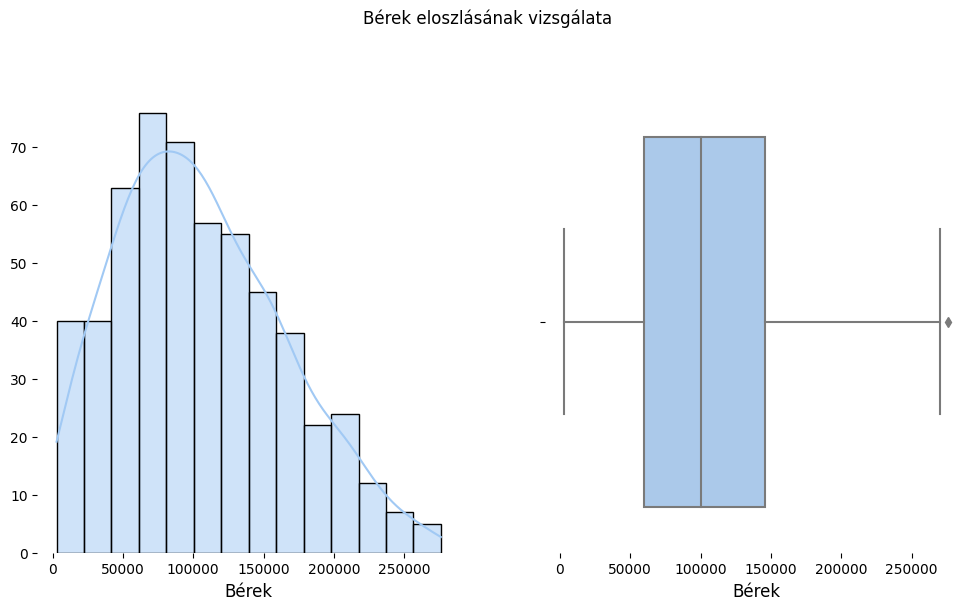

In [1761]:
#histogram és boxplot az outlierek kiszűrése után
salary_visualization(x="salary_in_usd", xlabel="Bérek")

Láthatjuk, hogy az outlierek eltávolításra kerültek, az adathalmazunk tiszta lett.

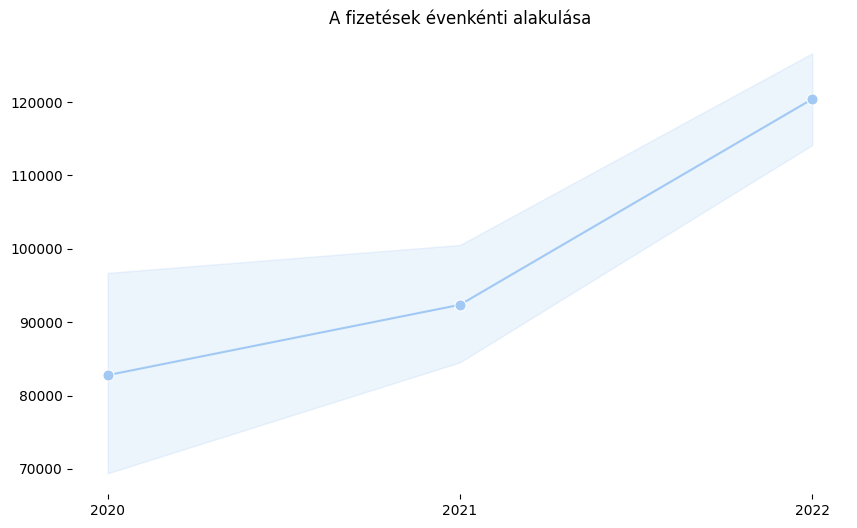

In [1762]:
#A fizetések évenkénti alakulása
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
ax = sn.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o', markersize=8 )
sn.despine(bottom=True, left=True)
plt.title('A fizetések évenkénti alakulása')
plt.xticks([2020, 2021, 2022])
plt.xlabel('')
plt.ylabel('')
plt.show()

Ahogy az idősoron is látszik, 2020 és 2021 között mérsékelt növekedés volt tapasztalható az adattudománnyal kapcsolatos bérek növekedésében, 2021 és 2022 között azonban meredekebben ívelt felfelé, amely esetleg összefüggésbe hozható magával a szakma népszerűségének növekedésével, melyet a munkahelyek növekedése is magyarázhat.

Text(0.5, 1.0, 'A fizetések évenkénti alakulása a vállalatmérete szerint')

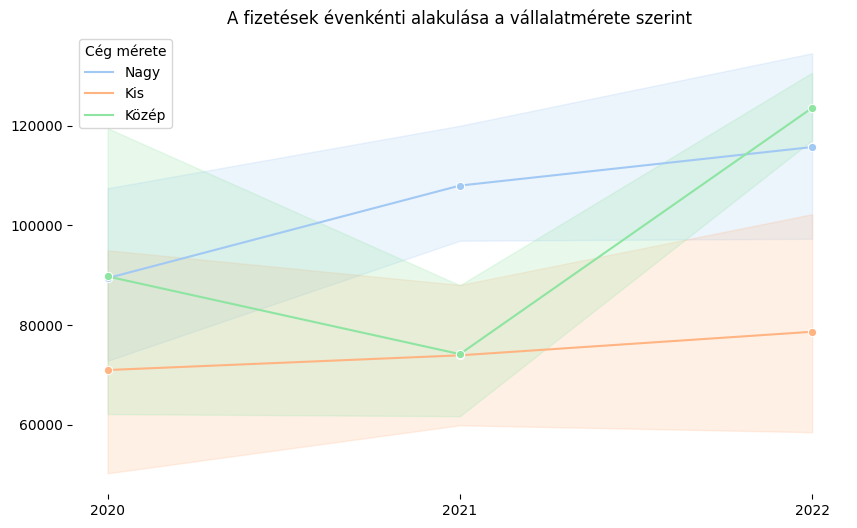

In [1763]:
#A fizetések évenkénti alakulása a vállalatmérete szerint
plt.figure(figsize=(10, 6))
ax = sn.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')
sn.despine(bottom=True, left=True)
plt.legend(title='Cég mérete', title_fontsize=10, fontsize=10, loc='upper left')
plt.xticks([2020, 2021, 2022])
plt.xlabel('')
plt.ylabel('')
plt.title('A fizetések évenkénti alakulása a vállalatmérete szerint')

A kis és nagy vállalkozások esetén is tapasztalható egy enyhe mértékű emelkedés a béreket illetően, a meglepetést azonban a középvállalkozások mutatják, melyek 2020 és 2021 között elkezdtek negatív irányt venni, azonban 2021 végén egy meredek felfeléívelés volt tapasztalható, megelőzve ezzel a nagy vállalatokat is.

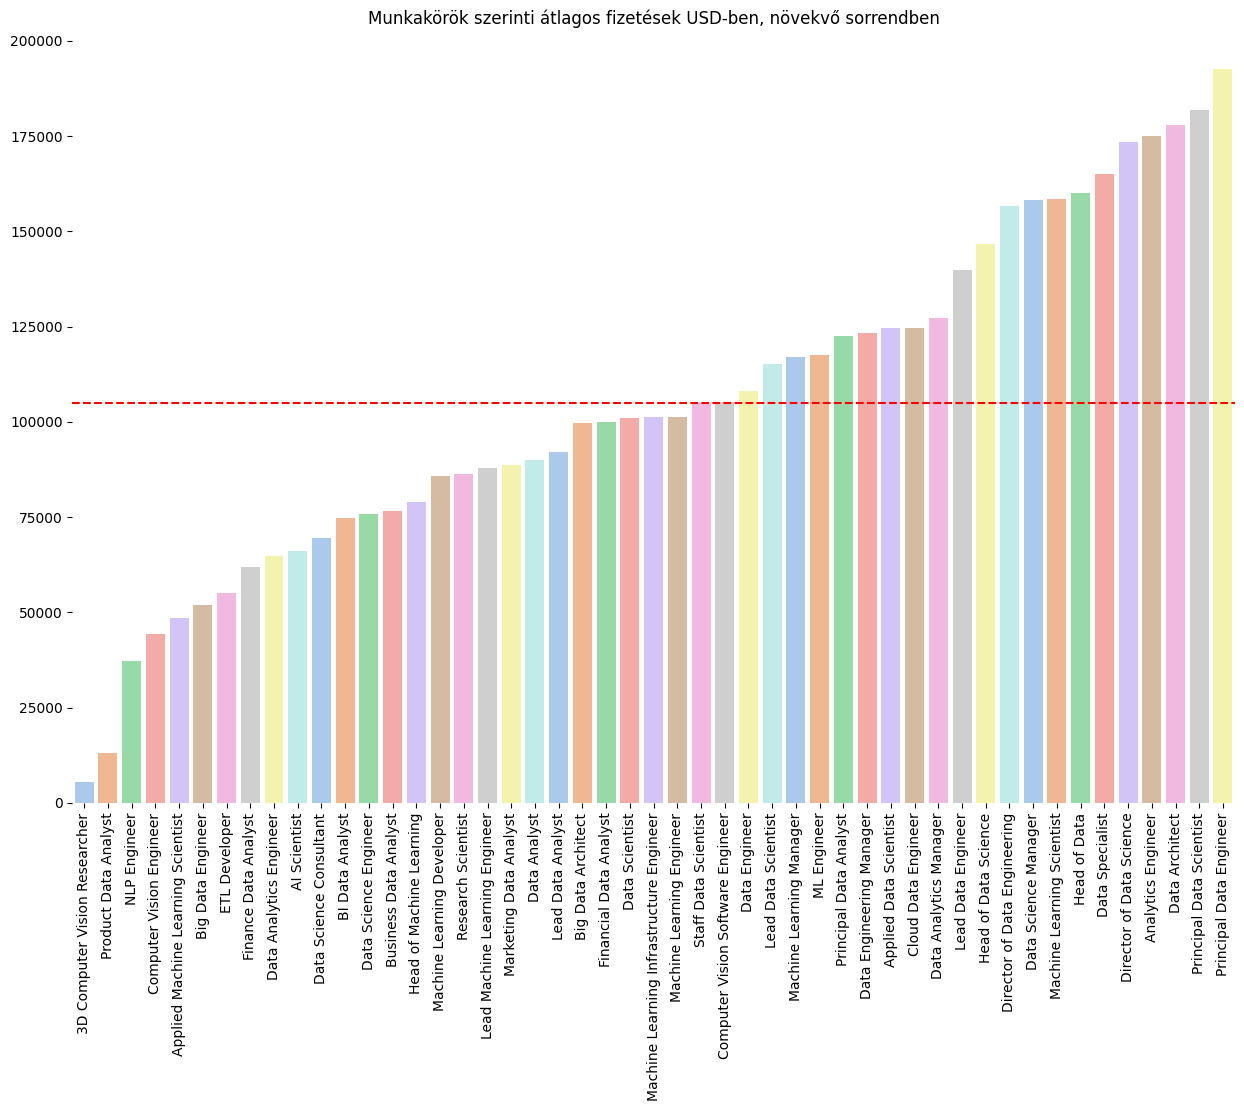

In [1764]:
# Fizetések és a munkakör kapcsolatának vizsgálata oszlopdiagramon

ordered_df = df.groupby('job_title')['salary_in_usd'].mean().sort_values().reset_index()
plt.figure(figsize=(15, 10))
ax=sn.barplot(x='job_title', y='salary_in_usd', data=ordered_df, palette='pastel')
sn.despine(bottom=True, left=True)
# Az átlagos fizetés megjelenítése piros szaggatott vonallal
average_salary = df['salary_in_usd'].mean()
plt.axhline(y=average_salary, color='r', linestyle='--', label=f'Átlagos fizetés ({average_salary:.2f} USD)')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Munkakörök szerinti átlagos fizetések USD-ben, növekvő sorrendben')
plt.show()

A fenti oszlopdiagramon látszik, hogy rengeteg féle pozíciót tartalmaz az adatbázis. A könnyebb átláthatóság érdekében a hasonló munkaköröket csoportosítom.

In [1765]:
# Csoportosítjuk a hasonló munkaköröket
job_categories = {
    'Data Scientist': ['Data Scientist', 'Data Science Consultant','Lead Data Scientist', 'Principal Data Scientist','Data Science Manager','Head of Data Science', 'NLP Engineer', 'AI Scientist', 'Data Science Engineer', 'Staff Data Scientist', 'Applied Data Scientist', 'Director of Data Science'],
    'Data Analyst': ['Data Analyst', 'Data Analytics Manager','Head of Data','Data Architect', 'Product Data Analyst','Finance Data Analyst','Financial Data Analyst','Data Analytics Engineer', 'Business Data Analyst', 'Marketing Data Analyst', 'Lead Data Analyst', 'Principal Data Analyst', 'Analytics Engineer'],
    'Machine Learning Engineer': ['Machine Learning Engineer', 'ML Engineer','Applied Machine Learning Scientist', 'Head of Machine Learning', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Manager','Machine Learning Scientist' ],
    'Data Engineer': ['Data Engineer', 'Data Engineering Manager', 'ETL Developer', 'Cloud Data Engineer', 'Lead Data Engineer', 'Director of Data Engineering', 'Head of Data', 'Data Specialist', 'Data Architect','Principal Data Engineer' ],
    'Business Intelligence': ['BI Data Analyst', 'Business Intelligence Developer'],
    'Computer Vision Engineer':['3D Computer Vision Researcher','Computer Vision Software Engineer', 'Computer Vision Engineer'],
    'Big Data Engineer':['Big Data Engineer', 'Big Data Architect']
}

# Új oszlop hozzáadása a csoportosított munkaköröknek
df['job_category'] = df['job_title'].map(lambda x: next((k for k, v in job_categories.items() if x in v), 'Other'))

# Ellenőrizzük az új oszlopot
print(df[['job_title', 'job_category']].head())

                    job_title               job_category
0              Data Scientist             Data Scientist
1  Machine Learning Scientist  Machine Learning Engineer
2           Big Data Engineer          Big Data Engineer
3        Product Data Analyst               Data Analyst
4   Machine Learning Engineer  Machine Learning Engineer


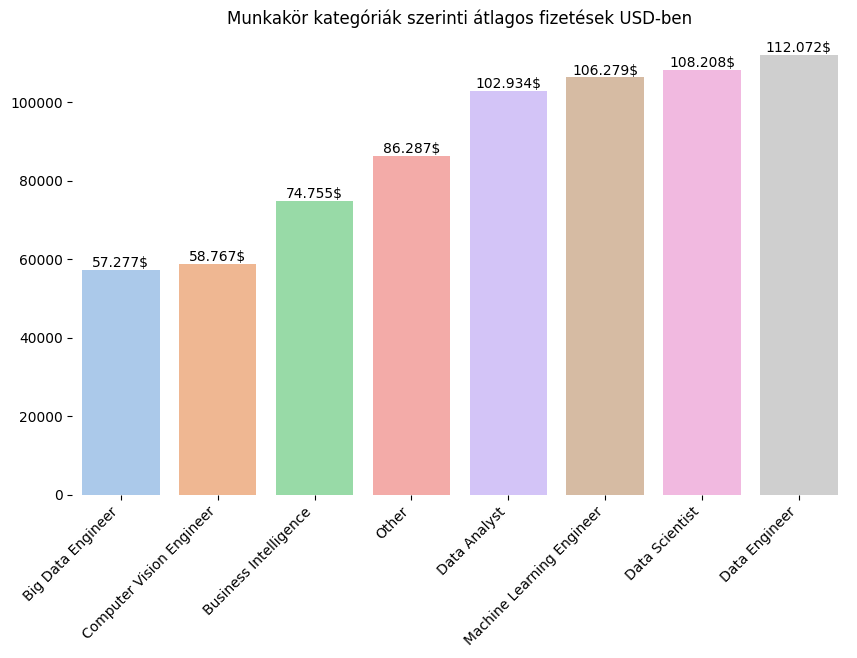

In [1766]:
# Csoportosítjuk az adatokat a munkakör kategóriák szerint és kiszámítjuk az átlagos fizetéseket
category_salary_df = df.groupby('job_category')['salary_in_usd'].mean().sort_values().reset_index()

plt.figure(figsize=(10, 6))
ax=sn.barplot(x='job_category', y='salary_in_usd', data=category_salary_df)
sn.despine(bottom=True, left=True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}$'.replace(',', '.'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, fontsize=10)
current_labels = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(current_labels, ha='right')
plt.title('Munkakör kategóriák szerinti átlagos fizetések USD-ben')
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

A top 3 terület, melyek a legjobb átlagos fizetést kapják: 1. Data Engineer 2. Data Scientist 3. Machine Learning Engineer. A fenti diagrammal nincs további célom, csupán érdekességképp szerettem volna csoportosítást végezni a 2020-2022 időszak legjobban fizetett állásairól.

Számos egyéb szempontból is meg lehetne nézni jobban az adatbázist, mint az elhelyezkedés szerinti fizetés megoszlása, vagy a tapasztalati szint függvényében való alakulása, azonban a célom a bérek előrejelzése, így abban az irányban folytatom tovább az elemzést.

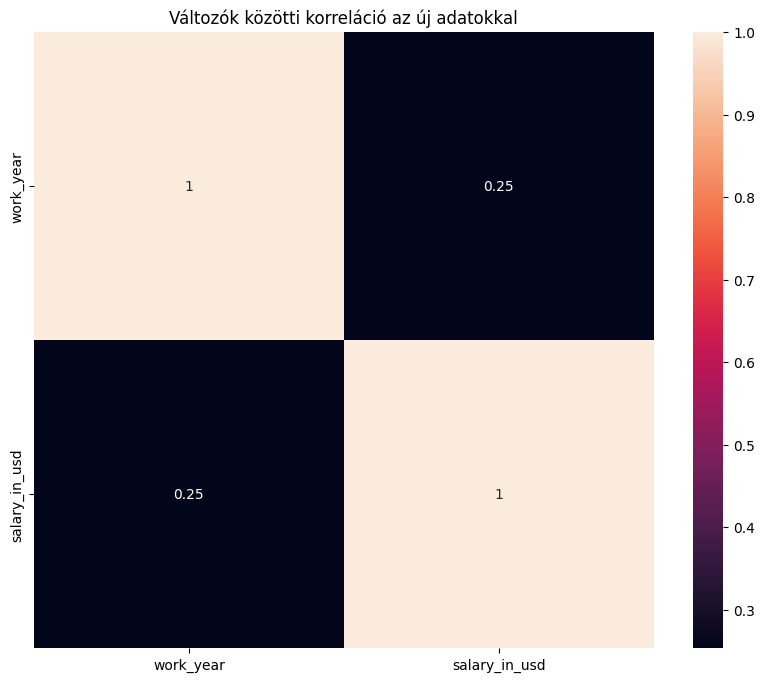

In [1767]:
corr = df.corr()

# A korrelációs mátrix megjelenítése heatmap formájában
plt.figure(figsize=(10, 8))
sn.heatmap(corr, annot=True)
plt.title('Változók közötti korreláció az új adatokkal')
plt.show()

A numerikus változók között nincs jelentős korreláció.

In [1768]:
#job_category oszlopra már nincs szükség, ezért törlöm
df = df.drop('job_category', axis=1)

#kategorikus változók szelektálása
categorical_columns = df.select_dtypes(include=['object'])
print(categorical_columns)

    experience_level  employment_type                   job_title  \
0        Középszintű  Teljes munkaidő              Data Scientist   
1             Senior  Teljes munkaidő  Machine Learning Scientist   
2             Senior  Teljes munkaidő           Big Data Engineer   
3        Középszintű  Teljes munkaidő        Product Data Analyst   
4             Senior  Teljes munkaidő   Machine Learning Engineer   
..               ...              ...                         ...   
602           Senior  Teljes munkaidő               Data Engineer   
603           Senior  Teljes munkaidő               Data Engineer   
604           Senior  Teljes munkaidő                Data Analyst   
605           Senior  Teljes munkaidő                Data Analyst   
606      Középszintű  Teljes munkaidő                AI Scientist   

    employee_residence      remote_ratio company_location company_size  
0              Germany    Nincs távmunka               DE         Nagy  
1                Japan   

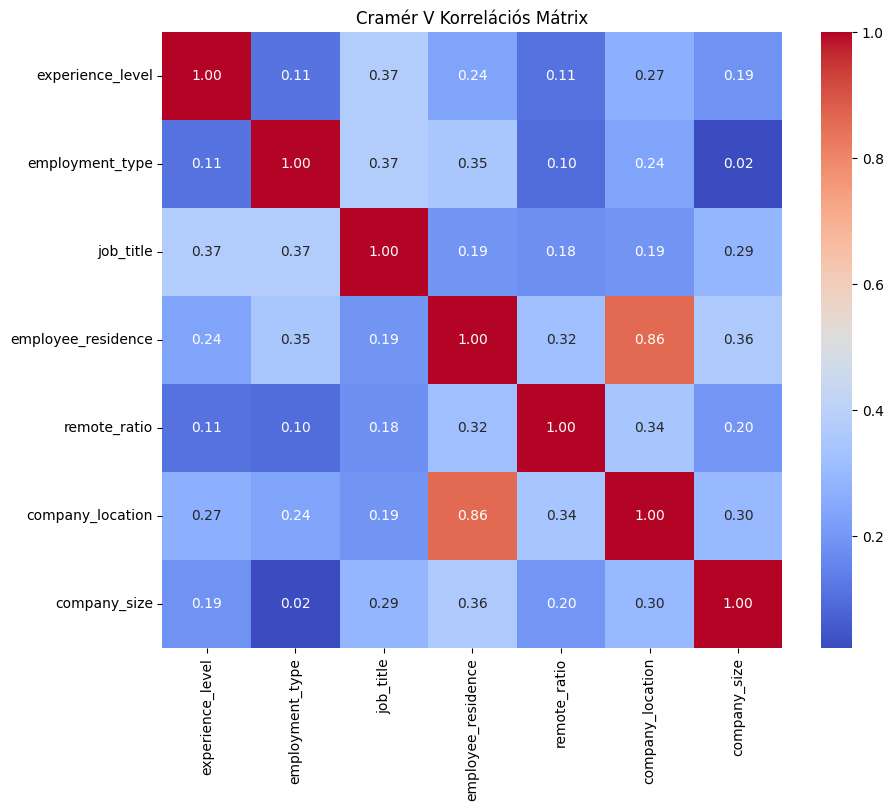

In [1769]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# A korrelációs mátrix létrehozása
columns = categorical_columns.columns
corr_cramers = pd.DataFrame(index=columns, columns=columns)

# Cramér V értékek számítása minden változópárra
for col1 in columns:
    for col2 in columns:
        corr_cramers.loc[col1, col2] = cramers_v(categorical_columns[col1], categorical_columns[col2])

# Az eredmény float típusúvá konvertálása
corr_cramers = corr_cramers.astype(float)

# Hőtérkép létrehozása a Cramér V értékekkel
plt.figure(figsize=(10, 8))
sn.heatmap(corr_cramers, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Hőtérkép címe és tengelyek címkézése
plt.title('Cramér V Korrelációs Mátrix')
plt.xlabel('')
plt.ylabel('')

# Hőtérkép megjelenítése
plt.show()



A fenti heatmap-ről leolvasható, hogy a company_location és az employee_residence között egy erős korrelációs kapcsolat van, ami azt sugallhatja, hogy az esetek jelentős hányadában a cég elhelyezkedése azonos a munkavállaló elhelyezkedésével. A prediktív modellek általánosításának javítása céljából az employee_residence jellemzőt eltávolítom, hogy elkerüljem a redundancia torzító hatását. A bérek előrejelzése szempontjából egyébként sem releváns az információ.

In [1770]:
df = df.drop('employee_residence', axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,Középszintű,Teljes munkaidő,Data Scientist,79833,Nincs távmunka,DE,Nagy
1,2020,Senior,Teljes munkaidő,Machine Learning Scientist,260000,Nincs távmunka,JP,Kis
2,2020,Senior,Teljes munkaidő,Big Data Engineer,109024,Részben távmunka,GB,Közép
3,2020,Középszintű,Teljes munkaidő,Product Data Analyst,20000,Nincs távmunka,HN,Kis
4,2020,Senior,Teljes munkaidő,Machine Learning Engineer,150000,Részben távmunka,US,Nagy


In [1771]:
#Kategorikus változók Encoding

# Bináris Encoding
binary_encoder = ce.BinaryEncoder(cols=['job_title', 'company_location'], return_df=True)
df_encoded = binary_encoder.fit_transform(df)

# Label Encoding
label_encoder = ce.OrdinalEncoder(cols=['experience_level', 'remote_ratio', 'company_size'])
df_encoded = label_encoder.fit_transform(df_encoded)

# One-Hot Encoding
onehot_encoder = ce.OneHotEncoder(cols=['employment_type'], use_cat_names=True)
df_encoded = onehot_encoder.fit_transform(df_encoded)

In [1772]:
df_encoded.head()

,work_year,experience_level,employment_type_Teljes munkaidő,employment_type_Megbízási szerződés alapján,employment_type_Részmunkaidő,employment_type_Szabadúszó,job_title_0,job_title_1,job_title_2,job_title_3,...,job_title_5,salary_in_usd,remote_ratio,company_location_0,company_location_1,company_location_2,company_location_3,company_location_4,company_location_5,company_size
0,2020,1,1,0,0,0,0,0,0,0,...,1,79833,1,0,0,0,0,0,1,1
1,2020,2,1,0,0,0,0,0,0,0,...,0,260000,1,0,0,0,0,1,0,2
2,2020,2,1,0,0,0,0,0,0,0,...,1,109024,2,0,0,0,0,1,1,3
3,2020,1,1,0,0,0,0,0,0,1,...,0,20000,1,0,0,0,1,0,0,2
4,2020,2,1,0,0,0,0,0,0,1,...,1,150000,2,0,0,0,1,0,1,1


In [1773]:
from sklearn.preprocessing import StandardScaler
#Standardizálás
standard_scaler = StandardScaler()
salary_scaler= StandardScaler()

original_salary_in_usd =salary_scaler.fit_transform(df_encoded['salary_in_usd'].values.reshape(-1, 1))

original_salary_in_usd = pd.DataFrame(original_salary_in_usd, columns=['original_salary_in_usd'])

df_standardized = standard_scaler.fit_transform(df_encoded)
df_encoded = pd.DataFrame(df_standardized, columns=df_encoded.columns)

original_salary_in_usd.head()

,original_salary_in_usd
0,-0.428146
1,2.629262
2,0.067221
3,-1.443503
4,0.762578


In [1774]:
#Előkészítés a gépi tanulási modell számára: x -> magyarázó változók, y -> célváltozó

x = df_encoded.drop(['salary_in_usd'],axis=1) 
y = df_encoded['salary_in_usd'].values
y=y.ravel() #egy dimenzióssá alakítás


In [1775]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1776]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# GridSearchCV paraméterrácsok
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
xgb_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}
cat_grid = {
    'depth': [4, 6, 8],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations'    : [30, 50, 100]
}

# GridSearchCV a modellekhez
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_grid, cv=3, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
xgb_grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=xgb_grid, cv=3, verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
cat_grid_search = GridSearchCV(estimator=CatBoostRegressor(verbose=0, random_state=42), param_grid=cat_grid, cv=3, verbose=2, n_jobs=-1)
cat_grid_search.fit(X_train, y_train)

# Legjobb paraméterek megjelenítése
print('Best parameters for Random Forest:', rf_grid_search.best_params_)
print('Best parameters for XGBoost:', xgb_grid_search.best_params_)
print('Best parameters for CatBoost:', cat_grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for XGBoost: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best parameters for CatBoost: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


In [1777]:
# A legjobb hiperparaméterek alkalmazása a modelleken
rf_best_grid_params = rf_grid_search.best_params_
xgb_best_grid_params = xgb_grid_search.best_params_
cat_best_grid_params = cat_grid_search.best_params_

# Modellek újra betanítása a legjobb paraméterekkel
rf_reg_best_grid = RandomForestRegressor(**rf_best_grid_params, random_state=42)
rf_reg_best_grid.fit(X_train, y_train)
y_pred_new_rf_best_grid = rf_reg_best_grid.predict(X_test)

xgb_reg_best_grid = XGBRegressor(**xgb_best_grid_params, random_state=42)
xgb_reg_best_grid.fit(X_train, y_train)
y_pred_new_xgb_best_grid = xgb_reg_best_grid.predict(X_test)

cat_reg_best_grid = CatBoostRegressor(**cat_best_grid_params, verbose=0, random_state=42)
cat_reg_best_grid.fit(X_train, y_train)
y_pred_new_cat_best_grid = cat_reg_best_grid.predict(X_test)

In [1778]:

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0)),
    ('XGBRegressor', XGBRegressor(random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Train Score: {train_score:.2f}")
    print(f"Test Score: {test_score:.2f}")    
    print("===================")

Model: Linear Regression
Mean Squared Error: 0.57
Root Mean Squared Error: 0.75
Mean Absolute Error: 0.56
R-squared: 0.41
Train Score: 0.42
Test Score: 0.41
Model: Decision Tree
Mean Squared Error: 0.65
Root Mean Squared Error: 0.81
Mean Absolute Error: 0.57
R-squared: 0.32
Train Score: 0.85
Test Score: 0.32
Model: Random Forest
Mean Squared Error: 0.44
Root Mean Squared Error: 0.66
Mean Absolute Error: 0.49
R-squared: 0.54
Train Score: 0.81
Test Score: 0.54
Model: Gradient Boosting
Mean Squared Error: 0.47
Root Mean Squared Error: 0.68
Mean Absolute Error: 0.50
R-squared: 0.51
Train Score: 0.68
Test Score: 0.51
Model: CatBoost
Mean Squared Error: 0.45
Root Mean Squared Error: 0.67
Mean Absolute Error: 0.49
R-squared: 0.53
Train Score: 0.84
Test Score: 0.53
Model: XGBRegressor
Mean Squared Error: 0.42
Root Mean Squared Error: 0.65
Mean Absolute Error: 0.49
R-squared: 0.56
Train Score: 0.85
Test Score: 0.56


In [1779]:
# Eredmények összegyűjtése
results_new = {}
results_new['Random Forest Best Grid'] = {
    'R2': r2_score(y_test, y_pred_new_rf_best_grid),
    'MSE': mean_squared_error(y_test, y_pred_new_rf_best_grid),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_new_rf_best_grid)),
    'MAE': mean_absolute_error(y_test, y_pred_new_rf_best_grid),
    'Train Score': rf_reg_best_grid.score(X_train, y_train),
    'Test Score': rf_reg_best_grid.score(X_test, y_test)
}
results_new['XGBoost Best Grid'] = {
    'R2': r2_score(y_test, y_pred_new_xgb_best_grid),
    'MSE': mean_squared_error(y_test, y_pred_new_xgb_best_grid),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_new_xgb_best_grid)),
    'MAE': mean_absolute_error(y_test, y_pred_new_xgb_best_grid),
    'Train Score': xgb_reg_best_grid.score(X_train, y_train),
    'Test Score': xgb_reg_best_grid.score(X_test, y_test)
}
results_new['CatBoost Best Grid'] = {
    'R2': r2_score(y_test, y_pred_new_cat_best_grid),
    'MSE': mean_squared_error(y_test, y_pred_new_cat_best_grid),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_new_cat_best_grid)),
    'MAE': mean_absolute_error(y_test, y_pred_new_cat_best_grid),
    'Train Score': cat_reg_best_grid.score(X_train, y_train),
    'Test Score': cat_reg_best_grid.score(X_test, y_test)
}

# Eredmények megjelenítése
for model, metrics in results_new.items():
    print(f'{model} Results:')
    for metric, value in metrics.items():
        print(f'  {metric}: {value}')
    print()

Random Forest Best Grid Results:
  R2: 0.5218527149307983
  MSE: 0.458706744570946
  RMSE: 0.6772789267140578
  MAE: 0.4929453240684943
  Train Score: 0.7552829337658118
  Test Score: 0.5218527149307983

XGBoost Best Grid Results:
  R2: 0.5656703713906617
  MSE: 0.4166706289700323
  RMSE: 0.6455002935475957
  MAE: 0.478170375885928
  Train Score: 0.6624478046990252
  Test Score: 0.5656703713906617

CatBoost Best Grid Results:
  R2: 0.5360187332995674
  MSE: 0.44511668901195683
  RMSE: 0.6671706595856541
  MAE: 0.49366793407517606
  Train Score: 0.7592292659310629
  Test Score: 0.5360187332995674



In [1780]:

# Előkészítjük az adatokat az előrejelzéshez (kivéve a célváltozót)
X_elorejelzes = df_encoded.drop('salary_in_usd', axis=1)

# Előrejelzés készítése az XGBoost modell segítségével
elorejelzes_xgb = xgb_reg_best_grid.predict(X_elorejelzes)


original_values = standard_scaler.inverse_transform(df_standardized)
df_original = pd.DataFrame(original_values, columns=df_encoded.columns)

df_encoded['elorejelzett_salary_in_usd_xgb'] = elorejelzes_xgb

# A 'elorejelzett_salary_in_usd_xgb' oszlop átalakítása numpy tömbbé
predicted_salary_array = df_encoded['elorejelzett_salary_in_usd_xgb'].values.reshape(-1, 1)

# A visszaállítás elvégzése
df_original['elorejelzett_salary_in_usd'] = salary_scaler.inverse_transform(predicted_salary_array)


df_original['salary_in_usd'] = df_original['salary_in_usd'].round().astype(int)
df_original['elorejelzett_salary_in_usd'] = df_original['elorejelzett_salary_in_usd'].round().astype(int)
df_original['salary_diff'] = (df_original['salary_in_usd'] - df_original['elorejelzett_salary_in_usd']).abs()

df_original['salary_diff_percent'] = ((df_original['elorejelzett_salary_in_usd'] - df_original['salary_in_usd']) / df_original['salary_in_usd'] * 100).round().astype(int).astype(str)

df_original[['salary_in_usd', 'elorejelzett_salary_in_usd', 'salary_diff', 'salary_diff_percent']].head(5)


,salary_in_usd,elorejelzett_salary_in_usd,salary_diff,salary_diff_percent
0,79833,78081,1752,-2
1,260000,120001,139999,-54
2,109024,93796,15228,-14
3,20000,56182,36182,181
4,150000,153689,3689,2


In [1781]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   work_year                                     555 non-null    float64
 1   experience_level                              555 non-null    float64
 2   employment_type_Teljes munkaidő               555 non-null    float64
 3   employment_type_Megbízási szerződés alapján   555 non-null    float64
 4   employment_type_Részmunkaidő                  555 non-null    float64
 5   employment_type_Szabadúszó                    555 non-null    float64
 6   job_title_0                                   555 non-null    float64
 7   job_title_1                                   555 non-null    float64
 8   job_title_2                                   555 non-null    float64
 9   job_title_3                                   555 non-null    flo

In [1782]:
df_original['salary_diff_percent'] = pd.to_numeric(df_original['salary_diff_percent'], errors='coerce')
df_original['salary_diff_percent'].describe()

count     555.000000
mean       26.704505
std       109.474850
min       -77.000000
25%       -15.500000
50%         5.000000
75%        33.000000
max      1521.000000
Name: salary_diff_percent, dtype: float64

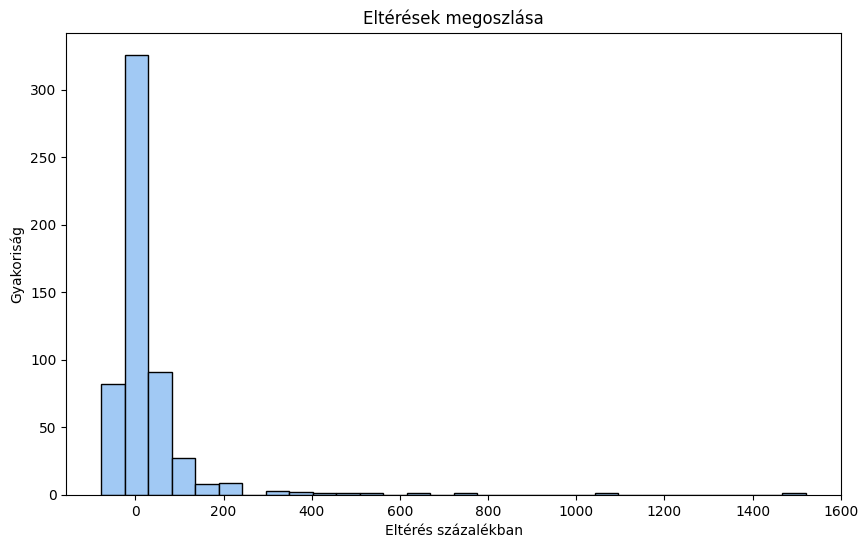

In [1783]:

plt.figure(figsize=(10, 6))
plt.hist(df_original['salary_diff_percent'].dropna(), bins=30, edgecolor='black')
plt.title('Eltérések megoszlása')
plt.xlabel('Eltérés százalékban')
plt.ylabel('Gyakoriság')
plt.show()


In [1788]:
# Kilistázzuk azokat az eseteket, ahol az eltérés meghaladja a 200%-ot, az előrejelzett és valós fizetésekkel együtt
szazalek_200_folotti_esetek = df_original[df_original['salary_diff_percent'] > 200][['salary_in_usd', 'elorejelzett_salary_in_usd', 'salary_diff_percent']]

szazalek_200_folotti_esetek.sort_values(by='salary_in_usd', ascending=True)

,salary_in_usd,elorejelzett_salary_in_usd,salary_diff_percent
171,2859,21746,661
180,4000,46370,1059
231,4000,34065,752
174,5679,92069,1521
208,5882,32287,449
21,6072,29675,389
15,8000,49047,513
191,9272,27902,201
36,10000,41491,315
491,10000,32006,220


In [1784]:
# Az átlagos eltérés kiszámítása évente
atlagos_elteres_evente = df_original.groupby('work_year')['salary_diff_percent'].mean()
atlagos_elteres_evente

work_year
2020.0    31.782609
2021.0    41.236967
2022.0    14.280000
Name: salary_diff_percent, dtype: float64

In [1789]:
# Keresztvalidáció elvégzése
scores = cross_val_score(xgb_reg_best_grid, x, y, cv=5)

# Eredmények megjelenítése
scores

array([0.39016019, 0.52873319, 0.62302301, 0.5133267 , 0.38642113])